In [1]:
# Name:  Obembe, Olufemi
# Assignment: Week5--build your own sentiment analysis
# Date:  January 15, 2022

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
# Read in the dataset

df = pd.read_csv('movies.tsv',sep='\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
# Remove html tags

from bs4 import BeautifulSoup
for i in range(df.shape[0]):
    df['review'][i] = BeautifulSoup(df['review'][i],"lxml").text

C:\Users\fobem\AppData\Local\Temp/ipykernel_18200/1916317450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = BeautifulSoup(df['review'][i],"lxml").text


In [10]:
# Remove punctuation

import string
def punctuation(text):
    review = [letters.lower() for letters in text if letters not in string.punctuation]
    review = ' '.join(review)
    return review

df['review'] = df['review'].apply(punctuation)

In [11]:
# Remove stopwords

def stopwords(text):
    review = [words for words in text.split() if words not in nltk.corpus.stopwords.words('english')]
    review = ' '.join(review)
    return review

df['review'] = df['review'].apply(stopwords)

In [12]:
# Stemming

from nltk import PorterStemmer
ps = PorterStemmer()
df['review'] = df['review'].apply(ps.stem)
df.head()

,id,sentiment,review
0,5814_8,1,stuff going moment mj ive started listening mu...
1,2381_9,1,classic war worlds timothy hines entertaining ...
2,7759_3,0,film starts manager nicholas bell giving welco...
3,3630_4,0,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...


In [13]:
# Convert text into numerical values with Tf-Idf

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

### Split the data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [15]:
# import the classifier and instantiate it

from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

In [16]:
# Fit the model to the dataset

Lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
# Make predictions on X_test

y_pred = Lr.predict(X_test)

In [19]:
# Evaluate the model
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2522
           1       0.88      0.90      0.89      2478

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [20]:
# Plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

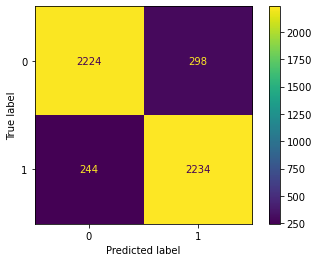

In [21]:
plot_confusion_matrix(Lr,X_test,y_test)

In [23]:
# Get the overall precision, recall

from sklearn.metrics import precision_score,recall_score

In [24]:
# Precision score

precision_score(y_test,y_pred)

0.882306477093207

In [25]:
recall_score(y_test,y_pred)

0.9015334947538337

In [26]:
# Plot the ROC curve

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

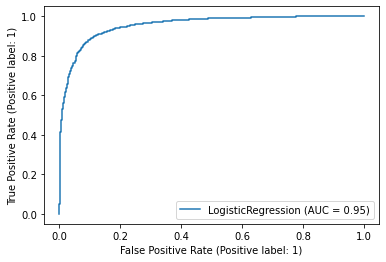

In [27]:
plot_roc_curve(Lr,X_test,y_test)

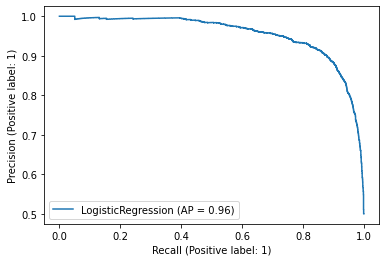

In [28]:
# plot precision_recall_curve

plot_precision_recall_curve(Lr,X_test,y_test)

### Refit the model using Naive Bayes 

In [29]:
from sklearn.naive_bayes import MultinomialNB
Nb = MultinomialNB()

In [30]:
Nb.fit(X_train,y_train)

MultinomialNB()

In [31]:
# Make predictions on X_test

yb_pred = Nb.predict(X_test)

In [32]:
# Evaluate the model
from sklearn import metrics

print(metrics.classification_report(y_test,yb_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2522
           1       0.87      0.85      0.86      2478

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [33]:
# Precision score

precision_score(y_test,yb_pred)

0.8728848534874123

In [34]:
#Overal Recall score

recall_score(y_test,yb_pred)

0.8535108958837773

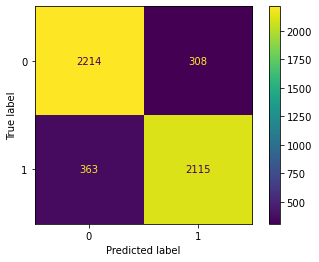

In [35]:
# plot the confusion matrix

plot_confusion_matrix(Nb,X_test,y_test)

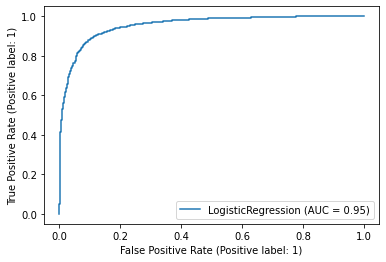

In [36]:
# Plot the ROC curve

plot_roc_curve(Lr,X_test,y_test)